# Assignment 6
#### Due October 28, 2020, 23:59

This week's assignment is about simulating a game, namely the famous casino game **craps**. 
You'll be asked to study the game description in detail and write python code that simulates the game in accordance with these rules. You will then be studying the win rate of the game in relation to the law of large numbers.

## Submission
Edit and turn in this jupyter notebook file containing your solutions to each task.  
Implement your solution to each of the exercises in the code field below the exercise description.  

The libraries you may need are already given, any extra imports are not allowed.

___

### Craps
The game of craps is a dice game you'll find in pretty much every casino in the world. The probability of winning craps is approximately 49.3 %.  
The game is played with two six-sided dice and consists of two phases: 
1. **Come-out roll**: the player rolls the two dice. If the sum of the dice is 2, 3 or 12, the player immediately loses. If the sum is 7 or 11, the player immediately wins. Any other come-out roll causes the player to continue to the next phase.
2. **Point roll**: the player keeps rolling the two dice again and again until either re-rolling their come-out roll sum or rolling a 7. If the player gets their come-out sum before rolling a 7, the player wins. If a 7 is rolled first, the player loses. 

This process is illustrated in the figure and examples below.
___

<img src="img/craps.png" align="right" width="350">

***Game example A***  
Alice rolls the dice...  

Come-out phase:  
- &emsp; 1&emsp;  +&emsp;  2&emsp;  =&emsp;  3&emsp;$\longrightarrow$ loss!  

___

***Game example B***  
Bob rolls the dice... 

Come-out phase:
- 5&emsp;  +&emsp;  1&emsp;  =&emsp;  6&emsp;$\longrightarrow$ move to point phase

Point phase:
- 1&emsp;  +&emsp;  2&emsp;  =&emsp;  3&emsp;$\longrightarrow$ re-roll 
- 2&emsp;  +&emsp;  6&emsp;  =&emsp;  8&emsp;$\longrightarrow$ re-roll  
- 4&emsp;  +&emsp;  2&emsp;  =&emsp;  6&emsp;$\longrightarrow$ win!  

___

***Game example C***  
Cat rolls the dice... 

Come-out phase:
- 5&emsp;  +&emsp;  5&emsp;  =&emsp;  10&emsp;$\longrightarrow$ move to point phase

Point phase:
- 3&emsp;  +&emsp;  6&emsp;  =&emsp;  9&emsp;&ensp;&ensp;$\longrightarrow$ re-roll 
- 6&emsp;  +&emsp;  5&emsp;  =&emsp;  11&emsp;$\longrightarrow$ re-roll  
- 1&emsp;  +&emsp;  3&emsp;  =&emsp;  4&emsp;&ensp;&ensp;$\longrightarrow$ re-roll  
- 2&emsp;  +&emsp;  5&emsp;  =&emsp;  7&emsp;&ensp;&ensp;$\longrightarrow$ loss!
___


## Assignment

In [1]:
import random
import matplotlib.pyplot as plt

### Exercise 1
First, we need to make a simulation of a single game of craps. 

Write a function `craps()` that takes no input and returns `True` if the game is won and `False` if the game is lost. Use python's `random` module to simulate the dice rolls.

*Note: The simulated dice rolls should of course be fair, that is the probability of rolling any of the possible six outcomes with a single dice should be $\frac{1}{6}$.*

___
`craps()`&emsp;&emsp;or&emsp;&emsp;`craps()`  
\>\> `True`&emsp;&emsp;&emsp;&emsp; &emsp; \>\> `False`


In [2]:
# helper function
def dice_roll():
    """Simulates a random roll of two dices and returns the result in a list of integers and the sum"""
    dice_roll = [random.randint(1,6), random.randint(1,6)]
    return (dice_roll, sum(dice_roll))

# subfunctions
def phase1():
    """Subfunction of Phase 1 of Craps."""
    roll1, sum1 = dice_roll()

    # print("Come-Out Roll: {}".format(roll1))
    # print("Come-Out Sum: {}".format(sum1))
    # print("--------------")

    if sum1 in [7,11]:
        return True
    elif sum1 in [2,3,12]:
        return False
    else:
        # print("Continue Playing! ...\n")
        return sum1

def phase2(sum1):    
    """Subfunction of Phase 2 of Craps"""
    while True:
        # print(input("Roll the Dice again by pressing 'Enter'"))
        next_roll, next_sum = dice_roll()

        # print("Roll Phase 2: {}".format(next_roll))
        # print("Sum Phase 2: {}".format(next_sum))
        # print("--------------")

        if next_sum == sum1:
            return True
        elif next_sum == 7:
            return False

def craps():
    # """Simulates a game of Craps"""
    # print("Welcome to a Game of Craps!")
    # print("----------------------\n")
    # print(input("Press 'Enter' to roll the Dice!"))

    result_p1 = phase1()

    if result_p1 not in [True,False]:
        result_p2 = phase2(result_p1)
        return result_p2
    else:
        return result_p1

In [3]:
craps()

True

## Exercise 2
When gambling, it is quite important to know the win-rate of the game you're playing.

Write a function called `estimate_craps_win_rate(n, seed)` that simulates `n` games of craps and returns the the estimated probability of winning as a float rounded to 3 decimal points.

- The `seed` parameter of your function should be used to set the random state using the `random.seed(int)` function for reproducability of your results. Remember to **only set the seed once** in your function!  

- Inside your function, you should call your `craps()` function from exercise 1 `n` times to simulate the craps games.

- The probability of winning is found by calculating the fraction of games where the player won, i.e. if a player wins 249 out of 500 games, the estimated
probability is $\frac{249}{500} = 0.4981$. 
___

`estimate_craps_win_rate(5, 7)`  
\>\> `0.8`

In [4]:
def estimate_craps_win_rate(n, seed):
    random.seed(seed)
    wins = 0

    for i in range(n):
        if craps() == True:
            wins += 1

    return wins/n    

In [5]:
estimate_craps_win_rate(5,7)

0.8

## Exercise 3

If you try calling `estimate_craps_win_rate(n, seed)` with `n` set to 5 or 10, you’ll notice that the estimated probability may be far from 0.493. However, if you attempt with larger values of `n` you’ll notice that the probability stabilizes.
This is explained by a theory called *the Law of Large Numbers* which states that the average of the results obtained from a large number of trials should be close to the expected value. In layman’s terms, this means that while a simulation may defy chance in a few cases, it rarely does so consistently over time. Your task is to investigate
this by plotting the phenomenon.

Run `estimate_craps_win_rate(n, seed)` for all values of `n`, 1 &leq; n &leq; 1000, and the`seed` set to 17. Plot the resulting values as a scatter plot. The figure should include a horizontal line showing the true winning probability of 0.493.

The plot **must** have named labels for the x and y axis, and a title.
___

<img src="img/ex3.png" align="left" width="350">

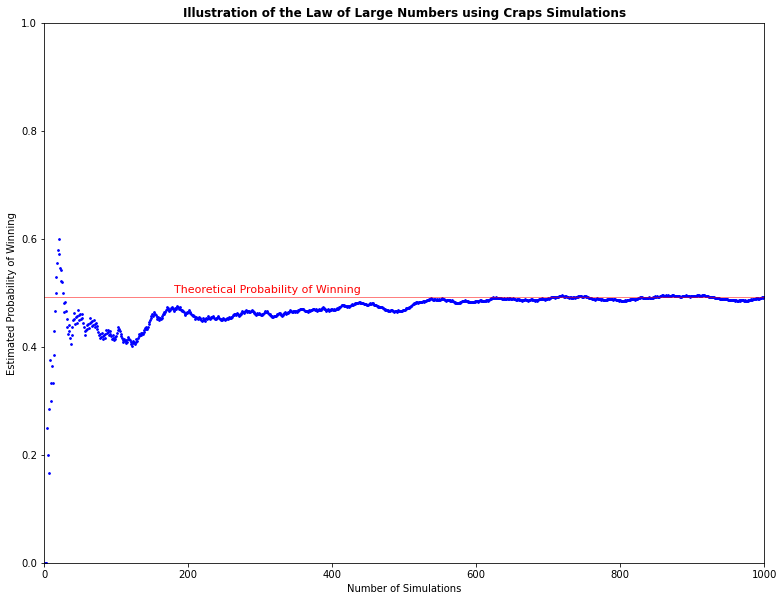

In [6]:
fig = plt.figure(figsize=(10, 7.5))
axes = fig.add_axes([0, 0, 1, 1])

for n in range (1,1000+1):
    axes.scatter(n, estimate_craps_win_rate(n, 17), s=3, color="b")

axes.axhline(y=0.493, color='r', linewidth=0.5)
axes.text(180, 0.5, "Theoretical Probability of Winning", color="r", fontsize=11)
    
axes.set_ylabel("Estimated Probability of Winning"); 
axes.set_xlabel("Number of Simulations"); 
axes.set_title("Illustration of the Law of Large Numbers using Craps Simulations", fontweight="bold");
axes.set_ylim(0,1);
axes.set_xlim(0,1000);